In [5]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
train = pd.read_csv('./train.csv')
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
processed_nondiscrete = train[["LotArea",
"YearBuilt",
"Fireplaces",
"PoolArea",
"YrSold",
"GarageArea",
"OverallQual",
"OverallCond",
"GarageCars",
"TotRmsAbvGrd"]]

In [8]:
processed_categorical = pd.get_dummies(train[["MSSubClass",
"MSZoning",
"Street",
"LandContour",
"Utilities",
"Neighborhood",
"Condition1",
"Condition2",
"BldgType",
"HouseStyle",
"Exterior1st",
"ExterQual",
"ExterCond",
"Foundation",
"Heating",
"HeatingQC",
"CentralAir",
"Electrical",
"KitchenQual",
"Functional",
"GarageType",
"GarageFinish",
"GarageQual",
"SaleCondition"
]])

In [15]:
df=processed_categorical
df.append(processed_nondiscrete)
df.head()

,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,20,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,60,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,70,0,0,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,60,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [17]:
df.isnull().sum()*100/df.shape[0]

MSSubClass               0.0
MSZoning_C (all)         0.0
MSZoning_FV              0.0
MSZoning_RH              0.0
MSZoning_RL              0.0
                        ... 
SaleCondition_AdjLand    0.0
SaleCondition_Alloca     0.0
SaleCondition_Family     0.0
SaleCondition_Normal     0.0
SaleCondition_Partial    0.0
Length: 148, dtype: float64

In [20]:
Y = train['SalePrice']
X = df

In [21]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [   -229.56956671  -23726.27204547   -2734.29077547    6026.32669589
    6885.10311383   13549.1330114     1387.28124065   -1387.28124055
  -14256.91626341   11386.77774556    8896.71653528   -6026.57801753
   41809.21694969  -41809.21694971   19480.44962184   -8138.95135745
   -8312.77071341  -29337.45517768    6206.83439788  -10087.45913489
   15179.06390792  -36187.9394442   -27877.04931181  -49844.55994962
  -36822.86061834  -18254.19118485  -26540.04907823   12958.83113927
   -4543.26251884   99301.6716387    57762.24654304  -44242.19511097
  -22946.42808861  -26793.4311669    -4191.02880089   17657.17297037
   75563.61171743   19083.22808807   30926.52163253   -3008.1802143
   -8456.38247965     994.58785511   23957.72083147   23138.18614367
  -11865.73282365    1421.05293483  -30567.88364786    4386.63140041
   -2849.91922298    8084.17031424    4530.77659281   72565.688213
 -110619.96632748   15941.23615167   11100.42311016    1247.59116857
    2790.4193017    37

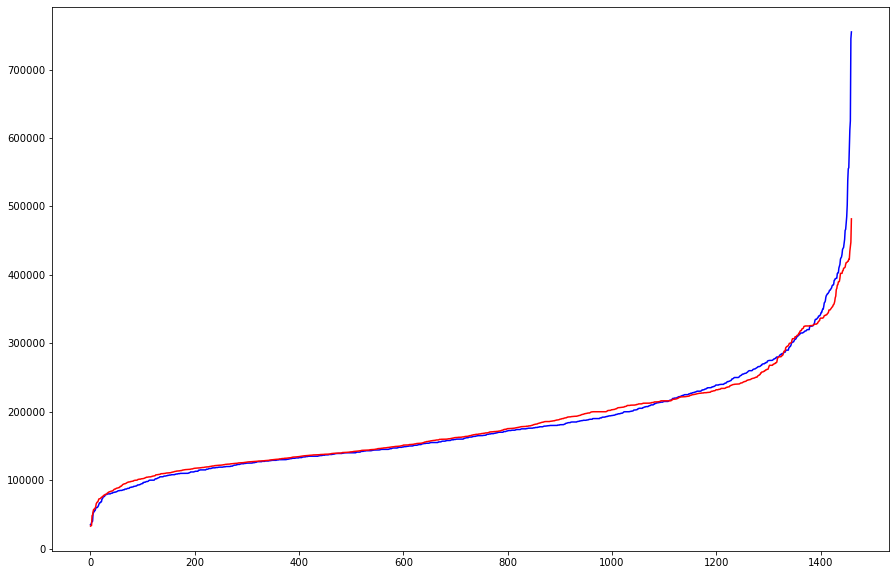

In [23]:
plt.figure(figsize=(15,10))
plt.plot(range(df.shape[0]),np.sort(Y),color="blue")
plt.plot(range(df.shape[0]),np.sort(lrm.predict(X)),color="red")
plt.show()